In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv(r'D:\Python Projects\Customer Churn Prediction using ANN\Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Dropping the columns which has unique values

df.drop(columns=['RowNumber','RowNumber','Surname'],inplace=True)

In [10]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
# One hot encoding on categorical columns

df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
# Train and test splitting

X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [26]:
X_train_trf

array([[-0.20216686,  0.16958176, -0.46460796, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [ 0.80704397, -2.30455945,  0.30102557, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.51908128, -1.19119591, -0.94312892, ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [-1.63233785,  0.9015152 , -0.36890377, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.38173152, -0.62420521, -0.08179119, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-1.37508365, -0.28401079,  0.87525072, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test_trf

array([[-1.05516175, -0.55204276, -0.36890377, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-0.51193473, -1.31490297,  0.10961719, ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [-0.80237087,  0.57162971,  0.30102557, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [ 1.13257291, -0.74791227, -0.27319958, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [ 1.34311575, -0.00566991, -0.46460796, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.56467681, -0.79945688, -0.84742473, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [48]:
# Creating the neural network

model = Sequential()

model.add(Dense(11,activation='relu',input_dim=12))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                143       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 287 (1.12 KB)
Trainable params: 287 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compiling the model

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
# Training the model on data

history = model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6184 - accuracy: 0.6569 - val_loss: 0.4984 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7961 - val_loss: 0.4670 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8009 - val_loss: 0.4493 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8028 - val_loss: 0.4382 - val_accuracy: 0.7981
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8052 - val_loss: 0.4298 - val_accuracy: 0.7937
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8086 - val_loss: 0.4226 - val_accuracy: 0.7944
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8098 - val_loss: 0.4149 - val_accuracy: 0.8006

In [52]:
# Predicting the data

y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [53]:
y_pred

array([[0.27380052],
       [0.24295853],
       [0.11477558],
       ...,
       [0.2573984 ],
       [0.11242458],
       [0.25235084]], dtype=float32)

In [56]:
y_pred = np.where(y_pred>0.5,1,0)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

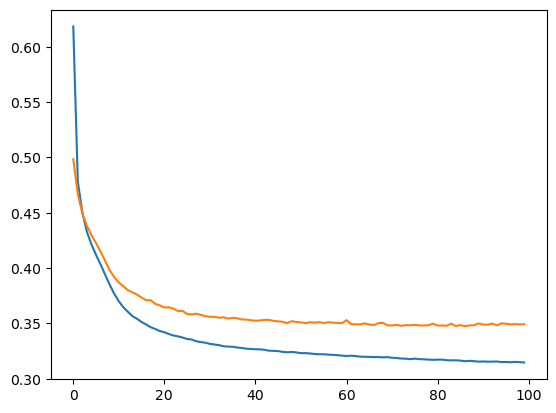

In [58]:
# Checking the plots for training loss and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

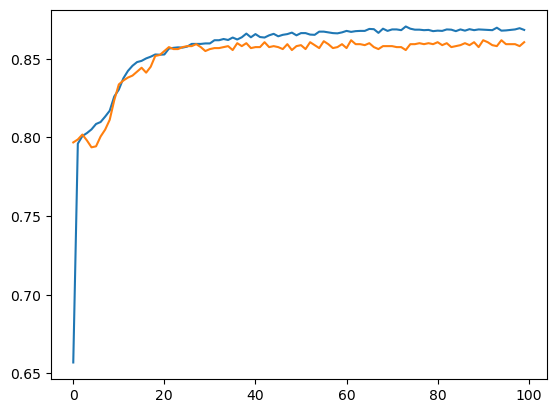

In [59]:
# Checking the plots for training accuracy and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])